In [11]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov8_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v8_df)

         Object  Confidence
0      backpack    0.324322
1  baseball bat    0.265569
2         bench    0.260719
3           car    0.352665
4       frisbee    0.331689
5       handbag    0.334265
6        person    0.858184
7    skateboard    0.316834
8         truck    0.719170


In [12]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov5_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v5_df)

         Object  Confidence
0      backpack    0.332606
1         bench    0.405148
2       bicycle    0.355403
3           car    0.345960
4       frisbee    0.401698
5       handbag    0.316137
6        person    0.843945
7  potted plant    0.379959
8    skateboard    0.287058
9         truck    0.710240


In [13]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/yolov8_vid1.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v3_df)

         Object  Confidence
0      backpack    0.259097
1  baseball bat    0.356125
2         bench    0.283097
3           car    0.359172
4       handbag    0.392830
5        person    0.885795
6         truck    0.743331


In [14]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Desktop/vid1_ssd.csv'
necessary_objects_path = '/Users/rupakraut/Desktop/classes.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]
# Display the mean confidence for each object
print(filtered_mean_confidence_ssd_df)

            Object  Confidence Score
0         airplane          0.359837
1         backpack          0.253766
2     baseball bat          0.172124
3   baseball glove          0.189526
4            bench          0.254764
5          bicycle          0.191999
6             bird          0.191377
7             boat          0.146002
8           bottle          0.164895
9             bowl          0.197904
10             bus          0.222197
11             car          0.205124
12             cat          0.149499
13      cell phone          0.246638
14           chair          0.228227
15           clock          0.159817
17             cow          0.200582
18             cup          0.166700
20             dog          0.218754
21        elephant          0.187003
22    fire hydrant          0.180718
23         frisbee          0.177462
24         giraffe          0.445738
25         handbag          0.373602
26           horse          0.260444
27            kite          0.161864
2

In [32]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() + 
                           df4['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:15]
# Now combined_df has one column for objects and three columns for confidences

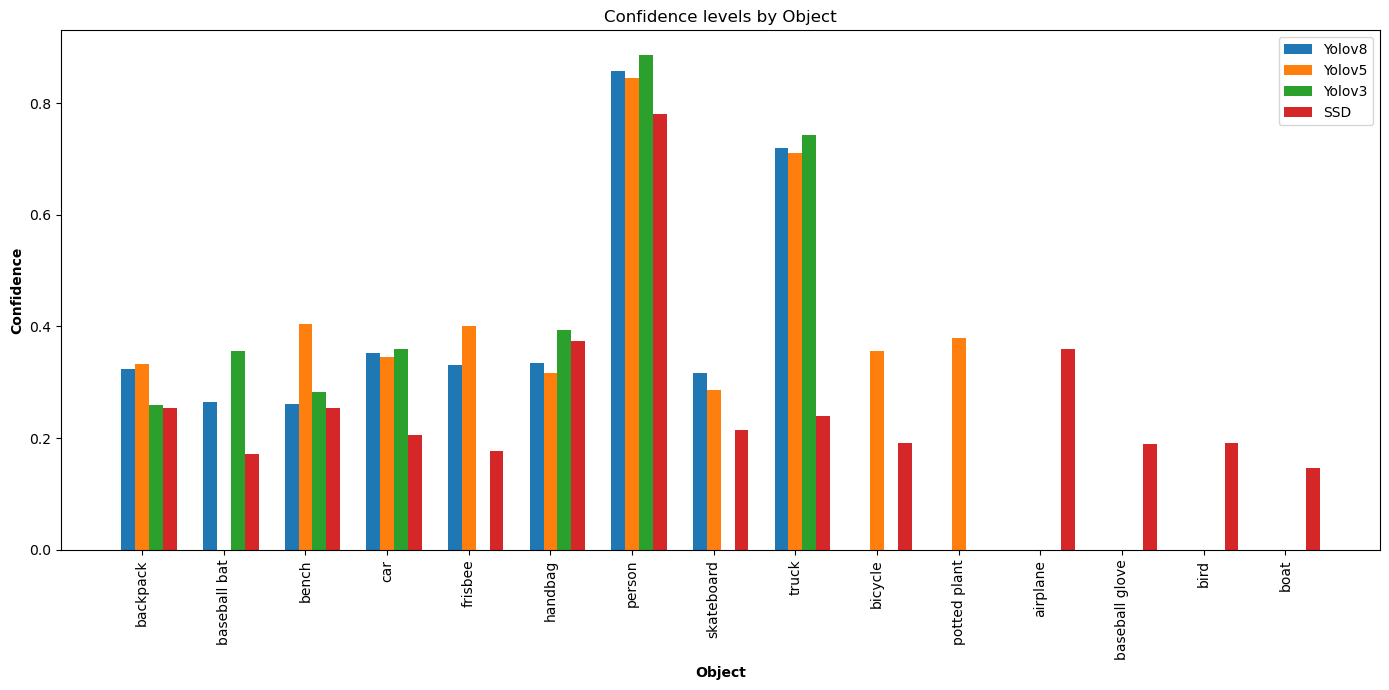

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.17

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')

# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()